In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [65]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [47]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

image_size = (224, 224)
batch_size = 32

train_ds = image_dataset_from_directory(
    "D:/Notes,tut,ppt,videos/Cdac notes/Cdac Essentials/Data/250-Bird_Species/consolidated/consolidated",
    labels = "inferred",
    label_mode = 'int',
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds =image_dataset_from_directory(
    "D:/Notes,tut,ppt,videos/Cdac notes/Cdac Essentials/Data/250-Bird_Species/consolidated/consolidated",
    labels = "inferred",
    label_mode = 'int',
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 37715 files belonging to 250 classes.
Using 30172 files for training.
Found 37715 files belonging to 250 classes.
Using 7543 files for validation.


In [48]:
labels = train_ds.class_names
print(labels)

['AFRICAN CROWNED CRANE', 'AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'ANHINGA', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ARARIPE MANAKIN', 'ASIAN CRESTED IBIS', 'BALD EAGLE', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BANDED BROADBILL', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BELTED KINGFISHER', 'BIRD OF PARADISE', 'BLACK FRANCOLIN', 'BLACK SKIMMER', 'BLACK SWAN', 'BLACK THROATED WARBLER', 'BLACK VULTURE', 'BLACK-CAPPED CHICKADEE', 'BLACK-NECKED GREBE', 'BLACK-THROATED SPARROW', 'BLACKBURNIAM WARBLER', 'BLUE GROUSE', 'BLUE HERON', 'BOBOLINK', 'BROWN NOODY', 'BROWN THRASHER', 'CACTUS WREN', 'CALIFORNIA CONDOR', 'CALIFORNIA GULL', 'CALIFORNIA QUAIL', 'CANARY', 'CAPE MAY WARBLER', 'CAPUCHINBIRD', 'CARMINE BEE-EATER', 'CASPIAN TERN', 'CASSOWARY', 'CHARA DE COLLAR', 'CHI

In [49]:
len(labels)

250

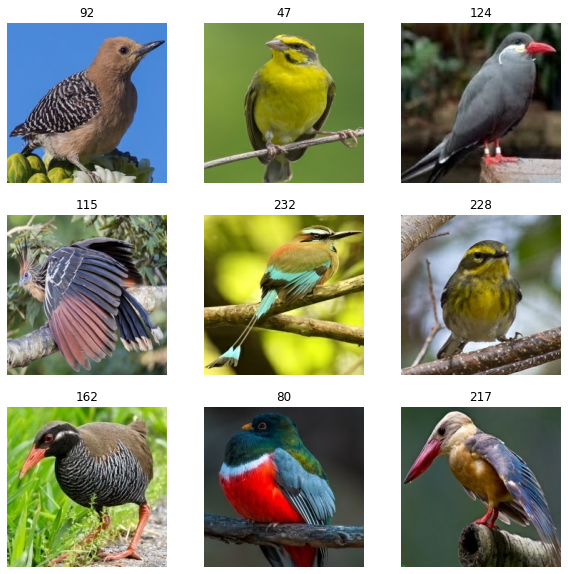

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [51]:
import warnings
warnings.filterwarnings("ignore")

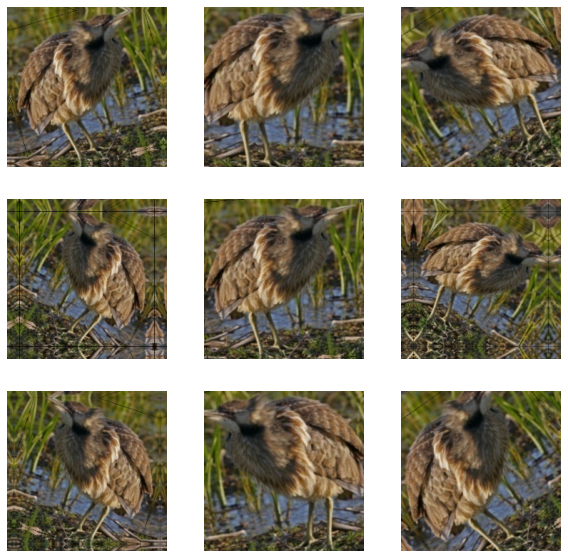

In [52]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(2):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [53]:
from tensorflow.keras.layers import MaxPooling2D

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D

In [55]:
#model = Sequential()
#model.add(data_augmentation)
#model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
#model.add(tf.keras.layers.Dense(1024,activation='relu'))
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(500,activation='softmax'))
#model.add(Dense(250,activation="softmax"))


In [56]:
model=Sequential()
#model.add(data_augmentation)
#model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(250,activation="softmax"))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 28, 64)      

In [57]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [58]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 28, 64)      

In [63]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255., # rescaling
                                   rotation_range = 40,  # for augmentation
                                   width_shift_range = 0.2,
                                   validation_split = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.,validation_split = 0.2)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory("D:/Notes,tut,ppt,videos/Cdac notes/Cdac Essentials/Data/250-Bird_Species/consolidated/consolidated",
                                                    batch_size = 32,
                                                    subset="training",
                                                    class_mode = 'categorical', 
                                                    target_size = (224, 224))


val_generator = val_datagen.flow_from_directory("D:/Notes,tut,ppt,videos/Cdac notes/Cdac Essentials/Data/250-Bird_Species/consolidated/consolidated",
                                                subset = "validation",
                                                    batch_size = 32,
                                                    class_mode = 'categorical', 
                                                    target_size = (224, 224))

Found 30270 images belonging to 250 classes.
Found 7445 images belonging to 250 classes.


In [66]:
history = model.fit(
            train_generator,
            validation_data = val_generator,
            epochs = 50,
            verbose = 1)

Epoch 1/50
946/946 [==============================] - 1271s 1s/step - loss: 4.8320 - accuracy: 0.0574 - val_loss: 3.9168 - val_accuracy: 0.1576
Epoch 2/50
946/946 [==============================] - 667s 705ms/step - loss: 3.8431 - accuracy: 0.1659 - val_loss: 3.2813 - val_accuracy: 0.2627
Epoch 3/50
946/946 [==============================] - 681s 720ms/step - loss: 3.3410 - accuracy: 0.2481 - val_loss: 3.0029 - val_accuracy: 0.3190
Epoch 4/50
946/946 [==============================] - 715s 756ms/step - loss: 3.0168 - accuracy: 0.3014 - val_loss: 2.7945 - val_accuracy: 0.3752
Epoch 5/50
946/946 [==============================] - 749s 792ms/step - loss: 2.8084 - accuracy: 0.3456 - val_loss: 2.5540 - val_accuracy: 0.4074
Epoch 6/50
946/946 [==============================] - 778s 823ms/step - loss: 2.6390 - accuracy: 0.3769 - val_loss: 2.3987 - val_accuracy: 0.4427
Epoch 7/50
946/946 [==============================] - 767s 811ms/step - loss: 2.5142 - accuracy: 0.3976 - val_loss: 2.2445 - v

In [68]:
test_loss, test_acc = model.evaluate(val_generator, verbose=1
                                    )

print('\nTest accuracy:', test_acc)

233/233 [==============================] - 64s 274ms/step - loss: 1.8967 - accuracy: 0.6048

Test accuracy: 0.6048354506492615


In [70]:

preds = model.predict(val_generator)
#if using softmax activation on output layer
predicted_labels  = np.argmax(preds,axis=1)

In [79]:
predicted_labels

array([230,  25,  59, ...,  96, 164, 189], dtype=int64)

In [80]:
history.history

{'loss': [4.8319573402404785,
  3.8431050777435303,
  3.3410134315490723,
  3.0168111324310303,
  2.8083765506744385,
  2.639007568359375,
  2.514248847961426,
  2.4138381481170654,
  2.3179075717926025,
  2.2381114959716797,
  2.15874981880188,
  2.1085216999053955,
  2.0576188564300537,
  2.0119988918304443,
  1.9617840051651,
  1.9301263093948364,
  1.8895244598388672,
  1.864447832107544,
  1.842362880706787,
  1.798346996307373,
  1.7689682245254517,
  1.7539564371109009,
  1.7297354936599731,
  1.7162115573883057,
  1.6818933486938477,
  1.671421766281128,
  1.6505725383758545,
  1.6396024227142334,
  1.6263165473937988,
  1.594148874282837,
  1.5923036336898804,
  1.5695507526397705,
  1.5441440343856812,
  1.5393469333648682,
  1.5259766578674316,
  1.5229705572128296,
  1.5001980066299438,
  1.4779657125473022,
  1.4781404733657837,
  1.484827995300293,
  1.46395742893219,
  1.4555717706680298,
  1.437558889389038,
  1.4160809516906738,
  1.4436967372894287,
  1.41443490982055

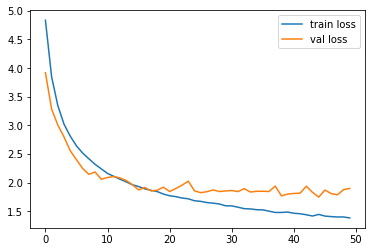

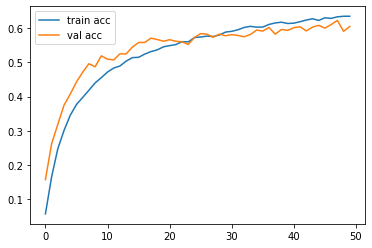

<Figure size 432x288 with 0 Axes>

In [81]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [82]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('Cnn_drop.h5')

In [83]:
y_pred = model.predict(val_generator)


In [84]:
y_pred

array([[7.0504933e-07, 2.8091692e-05, 1.1542414e-09, ..., 1.8960880e-05,
        1.6315489e-09, 1.7360348e-05],
       [1.1349426e-03, 1.7671128e-12, 1.9845662e-04, ..., 5.4584943e-06,
        2.9552117e-08, 2.2441707e-08],
       [1.1035841e-04, 1.5545465e-06, 1.6811848e-04, ..., 1.3165525e-08,
        8.7697121e-09, 1.0678119e-10],
       ...,
       [1.8431998e-03, 1.1342525e-12, 9.5494172e-05, ..., 7.4978004e-08,
        2.2674291e-12, 2.1071750e-10],
       [5.1395981e-14, 1.9963387e-11, 4.1840577e-16, ..., 3.2284328e-23,
        3.7678374e-20, 5.1777019e-19],
       [1.7209572e-05, 9.0627680e-07, 6.4160268e-08, ..., 1.7223766e-08,
        1.0642447e-12, 6.3892605e-07]], dtype=float32)

In [85]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [86]:
y_pred

array([ 24,  27,  70, ..., 205, 246, 122], dtype=int64)

In [97]:
len(y_pred)

7445

In [92]:
y_pred[0]

24

In [96]:
y_pred[249]

43

In [87]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [88]:
model=load_model('Cnn_drop.h5')

In [90]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [98]:
img=image.load_img('D:/Notes,tut,ppt,videos/Cdac notes/Cdac Essentials/CDAC Project/Bird-species/Custom Inputs/1.jpg',target_size=(224,224))



In [99]:
x=image.img_to_array(img)
x

array([[[231., 230., 235.],
        [231., 230., 235.],
        [231., 230., 235.],
        ...,
        [232., 231., 236.],
        [232., 231., 236.],
        [232., 231., 236.]],

       [[231., 230., 235.],
        [231., 230., 235.],
        [231., 230., 235.],
        ...,
        [232., 231., 236.],
        [232., 231., 236.],
        [232., 231., 236.]],

       [[231., 230., 235.],
        [231., 230., 235.],
        [231., 230., 235.],
        ...,
        [232., 231., 236.],
        [232., 231., 236.],
        [232., 231., 236.]],

       ...,

       [[161., 156., 100.],
        [159., 154.,  98.],
        [157., 152.,  96.],
        ...,
        [208., 205., 198.],
        [206., 203., 198.],
        [196., 195., 190.]],

       [[161., 156., 100.],
        [158., 153.,  97.],
        [157., 152.,  96.],
        ...,
        [205., 202., 195.],
        [204., 201., 194.],
        [195., 194., 189.]],

       [[161., 156., 100.],
        [158., 153.,  97.],
        [157., 1

In [100]:
x.shape

(224, 224, 3)

In [101]:
x=x/255

In [112]:
p= np.argmax(model.predict(x),axis=1)

In [113]:
p

array([163], dtype=int64)